In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

df = pd.read_csv('MedicalCost.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [2]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
encoder = OrdinalEncoder()
df['sex'] = encoder.fit_transform(df[['sex']])
df['smoker'] = encoder.fit_transform(df[['smoker']])
df['region'] = encoder.fit_transform(df[['region']])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


In [4]:
x = df.drop('charges', axis=1)
y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(x_train, y_train)

y_predic = rf.predict(x_test)


In [5]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_predic)

print('Error Absoluto Medio: ', mae)

Error Absoluto Medio:  2533.674643617756


In [6]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_predic)

print('Error cuadratico medio: ', mse)

rsme = np.sqrt(mse)

print('Raiz de error cuadratico: ', rsme)

log_rsem = np.log(rsme)

print('Logaritmo de la raiz del error cuadratico medio (Log RMSE): ', log_rsem)

Error cuadratico medio:  21073365.415079337
Raiz de error cuadratico:  4590.5735387944
Logaritmo de la raiz del error cuadratico medio (Log RMSE):  8.4317602492342


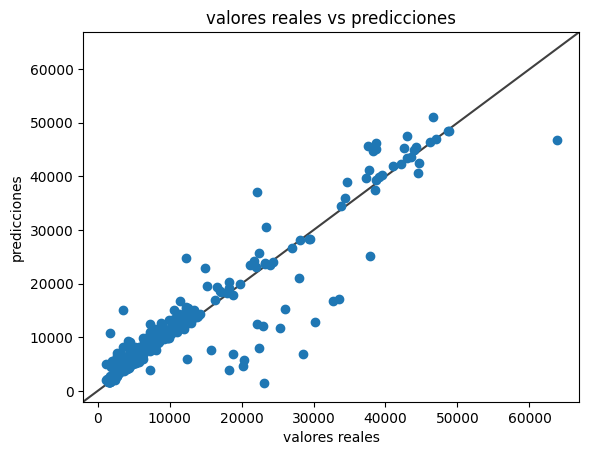

In [7]:
import  matplotlib.pyplot as plt

plt.scatter(y_test, y_predic)
plt.xlabel('valores reales')
plt.ylabel('predicciones')
plt.title('valores reales vs predicciones')

lims = [np.min([plt.xlim(), plt.ylim()]), np.max([plt.xlim(), plt.ylim()])]
plt.plot(lims, lims, 'k', alpha=0.75, zorder=0)
plt.xlim(lims)
plt.ylim(lims)

plt.show()


In [8]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_predic)

print('coeficiente de determinacion R2: ', r2)

coeficiente de determinacion R2:  0.8642606273649586


In [17]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer

trc = DecisionTreeRegressor()

rmse_scorer = make_scorer(mean_squared_error, squared=False)

scoring = {'r2' : 'r2', 'mse' : 'neg_mean_squared_error', 'mae' : 'neg_mean_absolute_error', 'rsme' : rmse_scorer}

scoresRandomForest = cross_validate(rf, x, y, cv=5, scoring=scoring)

scoresTreeRegresor = cross_validate(trc, x, y, cv=5, scoring=scoring)

print("Calificacion del modelo Random Forest Regresor")
for metric_name, scores_array in scoresRandomForest.items():
    print(f"{metric_name}: {scores_array.mean()}")
print("\n")

print("Clasificacion del Modelo Decision Tree Regresor")
for metric_name, scores_array in scoresTreeRegresor.items():
    print(f"{metric_name}: {scores_array.mean()}")

Calificacion del modelo Random Forest Regresor
fit_time: 1.6085024356842041
score_time: 0.045003318786621095
test_r2: 0.835954346067321
test_mse: -23770090.07483476
test_mae: -2685.2063484028363
test_rsme: 4862.061687142084


Clasificacion del Modelo Decision Tree Regresor
fit_time: 0.017817306518554687
score_time: 0.007999563217163086
test_r2: 0.712617294898328
test_mse: -41995451.37699628
test_mae: -3072.5070308625864
test_rsme: 6474.5287205794875
